In [29]:
import pandas as pd
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Attempt to dataframe the "stations" API
# Only retreiving stations' connectors info; API set-up troublesome

In [2]:
response = requests.get("https://api.plugsurfing.com/mfund/stations")
results=response.json()
results

[{'connectors': [{'id': 8757,
    'apiIdentifier': '+49*809*010*151178',
    'speed': 22,
    'powerType': 'AC3'},
   {'id': 8758,
    'apiIdentifier': '+49*809*010*151177',
    'speed': 22,
    'powerType': 'AC3'},
   {'id': 103914,
    'apiIdentifier': '+49*809*010*151178',
    'speed': 7.4,
    'powerType': 'AC1'}],
  'utilization': 49,
  'id': 1244,
  'provider': {},
  'deletedAt': None,
  'latitude': 51.263405,
  'longitude': 6.551713},
 {'connectors': [{'id': 10934,
    'apiIdentifier': '+49*809*010*150759',
    'speed': 22,
    'powerType': 'AC3'},
   {'id': 10935,
    'apiIdentifier': '+49*809*010*150760',
    'speed': 22,
    'powerType': 'AC3'}],
  'utilization': 7,
  'id': 1318,
  'provider': {},
  'deletedAt': None,
  'latitude': 50.196799,
  'longitude': 6.82781},
 {'connectors': [{'id': 10465,
    'apiIdentifier': '+49*809*010*151307',
    'speed': 22,
    'powerType': 'AC3'},
   {'id': 10466,
    'apiIdentifier': '+49*809*010*151308',
    'speed': 22,
    'powerType': 'A

In [3]:
data = pd.DataFrame(results)

In [4]:
data.head()

,connectors,utilization,id,provider,deletedAt,latitude,longitude
0,"[{'id': 8757, 'apiIdentifier': '+49*809*010*15...",49,1244,{},None,51.263405,6.551713
1,"[{'id': 10934, 'apiIdentifier': '+49*809*010*1...",7,1318,{},None,50.196799,6.827810
2,"[{'id': 10465, 'apiIdentifier': '+49*809*010*1...",3,1325,{},None,51.922328,7.673950
3,"[{'id': 185134, 'apiIdentifier': '+49*809*010*...",12,1332,{},None,51.468056,7.270833
4,"[{'id': 10940, 'apiIdentifier': '+49*809*010*1...",18,1333,{},None,51.465856,7.012906


In [5]:
connectors_into_df = pd.concat([pd.DataFrame(x) for x in data['connectors']], keys=data[:]).reset_index(level=1, drop=True).reset_index()

In [6]:
connectors_into_df

,index,id,apiIdentifier,speed,powerType
0,connectors,8757,+49*809*010*151178,22.0,AC3
1,connectors,8758,+49*809*010*151177,22.0,AC3
2,connectors,103914,+49*809*010*151178,7.4,AC1
3,utilization,10934,+49*809*010*150759,22.0,AC3
4,utilization,10935,+49*809*010*150760,22.0,AC3
5,id,10465,+49*809*010*151307,22.0,AC3
6,id,10466,+49*809*010*151308,22.0,AC3
7,provider,185134,+49*809*010*151542,22.0,AC3
8,provider,185136,+49*809*010*151541,22.0,AC3
9,deletedAt,10940,+49*809*010*150703,22.0,AC3


In [7]:
type(connectors_into_df)

pandas.core.frame.DataFrame

In [8]:
connectors_list = connectors_into_df.values.tolist()

In [9]:
connectors_list

[['connectors', 8757, '+49*809*010*151178', 22.0, 'AC3'],
 ['connectors', 8758, '+49*809*010*151177', 22.0, 'AC3'],
 ['connectors', 103914, '+49*809*010*151178', 7.4, 'AC1'],
 ['utilization', 10934, '+49*809*010*150759', 22.0, 'AC3'],
 ['utilization', 10935, '+49*809*010*150760', 22.0, 'AC3'],
 ['id', 10465, '+49*809*010*151307', 22.0, 'AC3'],
 ['id', 10466, '+49*809*010*151308', 22.0, 'AC3'],
 ['provider', 185134, '+49*809*010*151542', 22.0, 'AC3'],
 ['provider', 185136, '+49*809*010*151541', 22.0, 'AC3'],
 ['deletedAt', 10940, '+49*809*010*150703', 22.0, 'AC3'],
 ['deletedAt', 10941, '+49*809*010*150704', 22.0, 'AC3'],
 ['deletedAt', 103830, '+49*809*010*150703', 7.4, 'AC1']]

In [10]:
json.dumps(results)

'[{"connectors": [{"id": 8757, "apiIdentifier": "+49*809*010*151178", "speed": 22, "powerType": "AC3"}, {"id": 8758, "apiIdentifier": "+49*809*010*151177", "speed": 22, "powerType": "AC3"}, {"id": 103914, "apiIdentifier": "+49*809*010*151178", "speed": 7.4, "powerType": "AC1"}], "utilization": 49, "id": 1244, "provider": {}, "deletedAt": null, "latitude": 51.263405, "longitude": 6.551713}, {"connectors": [{"id": 10934, "apiIdentifier": "+49*809*010*150759", "speed": 22, "powerType": "AC3"}, {"id": 10935, "apiIdentifier": "+49*809*010*150760", "speed": 22, "powerType": "AC3"}], "utilization": 7, "id": 1318, "provider": {}, "deletedAt": null, "latitude": 50.196799, "longitude": 6.82781}, {"connectors": [{"id": 10465, "apiIdentifier": "+49*809*010*151307", "speed": 22, "powerType": "AC3"}, {"id": 10466, "apiIdentifier": "+49*809*010*151308", "speed": 22, "powerType": "AC3"}], "utilization": 3, "id": 1325, "provider": {}, "deletedAt": null, "latitude": 51.922328, "longitude": 7.67395}, {"c

In [11]:
type(json.dumps(results))

str

## Extracting 'vehicleUsage_df' from 'sessions' API 

In [12]:
response = requests.get("https://api.plugsurfing.com/mfund/sessions")
sessions_data=response.json()
sessions_data

{'accessMedium': {'app': 16.64972288722002,
  'chargingKey': 83.14039287705376,
  'unknown': 0.2098842357262214},
 'vehicleUsage': [{'name': 'unknown', 'percentage': 23.310267930344185},
  {'name': 'Renault Kangoo', 'percentage': 0.12133932377922801},
  {'name': 'Renault ZOE', 'percentage': 8.02464847868713},
  {'name': 'Tesla Model S', 'percentage': 2.0692379473083284},
  {'name': 'Smart ED4 Forfour', 'percentage': 0.7163591445229859},
  {'name': 'Smart EQ Forfour', 'percentage': 0.10494211786311611},
  {'name': 'BMW i3', 'percentage': 2.145898789062798},
  {'name': 'Tesla Model 3', 'percentage': 4.844004365205976},
  {'name': 'Hyundai Kona', 'percentage': 0.6271895771125104},
  {'name': 'Smart ED4 Fortwo', 'percentage': 2.266640431137204},
  {'name': 'Audi A3', 'percentage': 0.577650139844742},
  {'name': 'Citroën Berlingo', 'percentage': 1.1718536494714633},
  {'name': 'Jaguar I-PACE', 'percentage': 1.5142819663529348},
  {'name': 'Audi e-Tron', 'percentage': 1.7417268287959937},
  

In [13]:
type(sessions_data)

dict

In [14]:
vehicleUsage_dict = sessions_data['vehicleUsage']
vehicleUsage_dict

[{'name': 'unknown', 'percentage': 23.310267930344185},
 {'name': 'Renault Kangoo', 'percentage': 0.12133932377922801},
 {'name': 'Renault ZOE', 'percentage': 8.02464847868713},
 {'name': 'Tesla Model S', 'percentage': 2.0692379473083284},
 {'name': 'Smart ED4 Forfour', 'percentage': 0.7163591445229859},
 {'name': 'Smart EQ Forfour', 'percentage': 0.10494211786311611},
 {'name': 'BMW i3', 'percentage': 2.145898789062798},
 {'name': 'Tesla Model 3', 'percentage': 4.844004365205976},
 {'name': 'Hyundai Kona', 'percentage': 0.6271895771125104},
 {'name': 'Smart ED4 Fortwo', 'percentage': 2.266640431137204},
 {'name': 'Audi A3', 'percentage': 0.577650139844742},
 {'name': 'Citroën Berlingo', 'percentage': 1.1718536494714633},
 {'name': 'Jaguar I-PACE', 'percentage': 1.5142819663529348},
 {'name': 'Audi e-Tron', 'percentage': 1.7417268287959937},
 {'name': 'Audi Q7', 'percentage': 0.17763639742454548},
 {'name': 'Mitsubishi Outlander', 'percentage': 0.949398222542879},
 {'name': 'Volkswagen

In [15]:
vehicleUsage_df=pd.DataFrame(vehicleUsage_dict)
vehicleUsage_df

,name,percentage
0,unknown,23.310268
1,Renault Kangoo,0.121339
2,Renault ZOE,8.024648
3,Tesla Model S,2.069238
4,Smart ED4 Forfour,0.716359
...,...,...
88,Kia XCeed,0.003279
89,Opel Mokka-e,0.004919
90,DS DS3 Crossback,0.000468
91,Ford Focus Electric,0.000468


In [27]:
#change column 'name' to "type-of-cars" and "percentaage" to "usage coefficient"
vehicleUsage_df.rename(columns={'name':'type-of-cars', 'percentage':'usage-coefficient'})
vehicleUsage_df.head()

,type-of-cars,usage_coefficient
0,unknown,23.310268
1,Renault Kangoo,0.121339
2,Renault ZOE,8.024648
3,Tesla Model S,2.069238
4,Smart ED4 Forfour,0.716359


In [26]:
vehicleUsage_df.sort_values("usage_coefficient", ascending=False).reset_index(drop=True)

,type-of-cars,usage_coefficient
0,Volkswagen e-Golf,96.064253
1,unknown,23.310268
2,Volkswagen e-Up,16.188489
3,Renault ZOE,8.024648
4,Tesla Model 3,4.844004
...,...,...
88,Polestar 2,0.001968
89,Peugeot e-2008,0.000468
90,DS DS3 Crossback,0.000468
91,Ford Focus Electric,0.000468


In [17]:
#pickle
vehicleUsage_df.to_pickle('vehicleUsage_pickle.pkl')

## Chart vehicleUsage

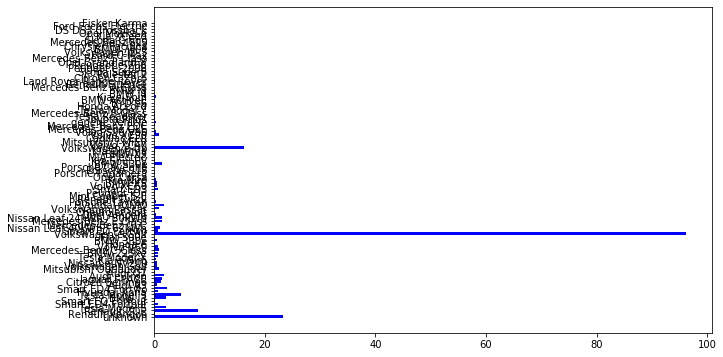

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

plt.barh(vehicleUsage_df["type-of-cars"],
       vehicleUsage_df["usage_coefficient"],
       color = "blue");